In [2]:
import tensorflow as tf

In [3]:
# get helper function
import os

if os.path.exists('helper_functions.py'):
  print('[INFO] This file is already exists. :-)')

else:
  !wget 'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py'

--2023-09-13 20:41:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2023-09-13 20:41:42 (10.8 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
# import series of helper function
from helper_functions import create_tensorboard_callback, unzip_data

In [5]:
# Download data and unzip
!wget 'https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip'

unzip_data('nlp_getting_started.zip')

--2023-09-13 20:41:42--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.207, 64.233.188.207, 173.194.174.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   958KB/s    in 0.6s    

2023-09-13 20:41:43 (958 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [6]:
# Visualize the train dataset
import pandas as pd
train_data = pd.read_csv('train.csv')
train_data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
test_data = pd.read_csv('test.csv')
test_data.head(5)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [8]:
# shuffle trainig dataframe
train_data_shuffled = train_data.sample(frac=1, random_state=42)

In [9]:
train_data_shuffled.head(5)

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [10]:
train_data.target.count()

7613

In [11]:
train_data.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [12]:
len(train_data), len(test_data), len(train_data)+len(test_data)

(7613, 3263, 10876)

In [13]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_data)-5) # create random indexes not higher than the total number of samples
for row in train_data_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 0 (not real disaster)
Text:
Russian customs destroyed a total of 319 tons of food today phew! Some Italian meats were burned in an incinerator in Pulkovo airport.

---

Target: 1 (real disaster)
Text:
-=-0!!!!. Photo: LASTMA officials challenge police for driving against traffic in Lagos http://t.co/8VzsfTR1bG

---

Target: 0 (not real disaster)
Text:
@RJG0789 idk....I feel like his movies have done more harm than good. They make us look sterotypical annddd colorism is prevalent sort of

---

Target: 1 (real disaster)
Text:
The Latest: More Homes Razed by Northern California Wildfire - ABC News http://t.co/YmY4rSkQ3d

---

Target: 0 (not real disaster)
Text:
Save your riches in heaven where they will never decrease because no thief can gets them and no moth can destroy them. ??

---



In [14]:
# train, test split using sklearn model selection
from sklearn.model_selection import train_test_split


In [15]:
train_sentences, validation_sentences, train_labels, validation_labels = train_test_split(train_data_shuffled.text.to_numpy(), # return numpy dtype array
                                                                                               train_data_shuffled.target.to_numpy(),
                                                                                               test_size=0.1,
                                                                                               random_state=42)

In [16]:
len(train_sentences)

6851

In [17]:
train_sentences[:10]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk',
       '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
       'destroy the free fandom honestly',
       'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
       '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
       'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
      dtype=object)

In [18]:
validation_labels[:10]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [21]:
# Tokenization
from tensorflow.keras.layers import TextVectorization

test_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None
                                    )


In [22]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [23]:
max_vocab_length=10000
max_length=15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length)

In [24]:
text_vectorizer.adapt(train_sentences)

In [26]:
# Create a sample sentence and tokenize it.
sample_sentence = 'This is Tushar Kumar Mahata. Joy Bangla, My name!'
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  19,    9,    1,    1,    1, 2915,    1,   13,  735,    0,    0,
           0,    0,    0,    0]])>

In [29]:
# Choose a random sentence and tokenize it.
random_sentence = random.choice(train_sentences)
print(f'The random sentence is : {random_sentence}')
print(f'After Tokenization: {text_vectorizer(random_sentence)}')

The random sentence is : Set goals &amp; DEMOLISH them all! ?
After Tokenization: [ 284 3812   35  516   93   44    0    0    0    0    0    0    0    0
    0]


In [31]:
# Go through the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
print(f'Total words in vocabulary: {len(words_in_vocab)}')
print(f'Most common words: {words_in_vocab[:5]}')
print(f'Lowest common words {words_in_vocab[-5:]}')

Total words in vocabulary: 10000
Most common words: ['', '[UNK]', 'the', 'a', 'in']
Lowest common words ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


In [34]:
from tensorflow.keras import layers

tf.random.set_seed(42)

embedding = layers.Embedding(input_dim=max_vocab_length, #set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer='uniform', # intialize randomly
                             input_length = max_length, # How long each input.
                             name='embedding_layer'

                             )

In [37]:
print(f'Random Sentence: {random_sentence}')
print(f'Embedding Outcome: {embedding(text_vectorizer([random_sentence]))}')

Random Sentence: Set goals &amp; DEMOLISH them all! ?
Embedding Outcome: [[[-0.0076666  -0.02256492 -0.03816741 ... -0.01435294  0.02266796
    0.00119269]
  [-0.03289634  0.00336534 -0.00882713 ... -0.01262846  0.02617029
   -0.03461591]
  [-0.03670989  0.01974517  0.02591839 ... -0.03332537 -0.03256448
    0.01337204]
  ...
  [ 0.04767145 -0.02711478 -0.00065818 ...  0.00896604 -0.04193427
   -0.01141461]
  [ 0.04767145 -0.02711478 -0.00065818 ...  0.00896604 -0.04193427
   -0.01141461]
  [ 0.04767145 -0.02711478 -0.00065818 ...  0.00896604 -0.04193427
   -0.01141461]]]


In [38]:
embedding_sample = embedding(text_vectorizer([random_sentence]))

In [39]:
embedding_sample

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.0076666 , -0.02256492, -0.03816741, ..., -0.01435294,
          0.02266796,  0.00119269],
        [-0.03289634,  0.00336534, -0.00882713, ..., -0.01262846,
          0.02617029, -0.03461591],
        [-0.03670989,  0.01974517,  0.02591839, ..., -0.03332537,
         -0.03256448,  0.01337204],
        ...,
        [ 0.04767145, -0.02711478, -0.00065818, ...,  0.00896604,
         -0.04193427, -0.01141461],
        [ 0.04767145, -0.02711478, -0.00065818, ...,  0.00896604,
         -0.04193427, -0.01141461],
        [ 0.04767145, -0.02711478, -0.00065818, ...,  0.00896604,
         -0.04193427, -0.01141461]]], dtype=float32)>

In [40]:
embedding_sample[0][0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([-0.0076666 , -0.02256492, -0.03816741, -0.02832172, -0.01662655,
        0.03803286,  0.04430631,  0.0168115 , -0.03750731,  0.02294919,
       -0.04330703, -0.01189674, -0.02373903, -0.04813027, -0.01107373,
       -0.04332611,  0.01698936, -0.04191373,  0.04270286, -0.03150898,
       -0.04425878,  0.02188053, -0.01497598, -0.04509449,  0.03597996,
       -0.0151233 ,  0.01788184,  0.01195478, -0.03128089,  0.00839442,
        0.00409777, -0.02056706, -0.01570136, -0.04932562,  0.03250028,
       -0.04855539,  0.01788208,  0.04016627,  0.04297305, -0.03944789,
        0.00811104,  0.02624748, -0.00490981, -0.04123155,  0.02198486,
       -0.03063822,  0.02964929, -0.01821582, -0.01226109,  0.00059618,
       -0.0036893 ,  0.01872081, -0.04696409, -0.04612763, -0.04968636,
       -0.04894712,  0.01416191,  0.00104107,  0.0318123 ,  0.01603626,
        0.01376852, -0.01760855, -0.04756374,  0.00978065,  0.04604841,
        0.048486

In [41]:
embedding_sample.ndim

3

In [42]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

In [44]:
# A simple Dense Model using Functional API

from helper_functions import create_tensorboard_callback
from tensorflow.keras import layers

save_dir = 'model_logs'

inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid', name='output_layer')(x)
model_1 = tf.keras.Model(inputs, outputs, name='model_1')

In [45]:
model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [46]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(dir_name=save_dir,
                                                                     experiment_name='model_1')])

Saving TensorBoard log files to: model_logs/model_1/20230913-222657
Epoch 1/5
215/215 [==============================] - 6s 21ms/step - loss: 0.6090 - accuracy: 0.6949 - val_loss: 0.5362 - val_accuracy: 0.7533
Epoch 2/5
215/215 [==============================] - 4s 17ms/step - loss: 0.4409 - accuracy: 0.8187 - val_loss: 0.4694 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 4s 17ms/step - loss: 0.3461 - accuracy: 0.8606 - val_loss: 0.4593 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.2845 - accuracy: 0.8920 - val_loss: 0.4643 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 4s 18ms/step - loss: 0.2376 - accuracy: 0.9127 - val_loss: 0.4769 - val_accuracy: 0.7861


<Axes: >

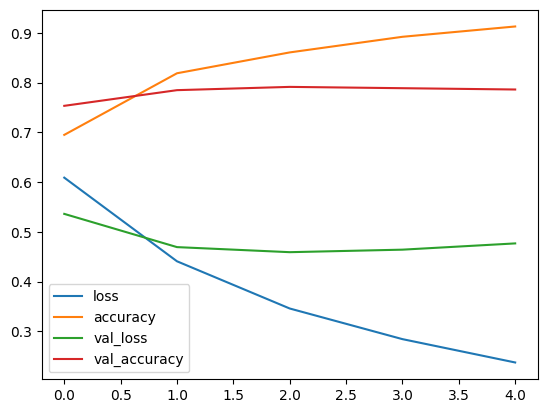

In [47]:
import pandas as pd
pd.DataFrame(model_1_history.history).plot()

In [49]:
# Make predictions (these come back in the form of probabilities)
model_1_pred_probs = model_1.predict(validation_sentences)
model_1_pred_probs[:10] # only print out the first 10 prediction probabilities

24/24 [==============================] - 0s 2ms/step


array([[0.40955552],
       [0.7428574 ],
       [0.99784285],
       [0.11248054],
       [0.10530981],
       [0.938404  ],
       [0.91565615],
       [0.9929622 ],
       [0.9699598 ],
       [0.26927245]], dtype=float32)

In [50]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [52]:
# Calculate model_1 metrics
model_1_results = calculate_results(y_true=validation_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 'recall': 0.7860892388451444,
 'f1': 0.7832971347503846}

In [53]:
# Set random seed and create embedding layer for evary model
tf.random.set_seed(42)
model_2_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding_layer_2')

# Create LSTM Model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_2_embedding(x)
print(x.shape)
x = layers.LSTM(64)(x)
print(f'lstm shape: {x.shape}')
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='model_2')

(None, 15, 128)
lstm shape: (None, 64)


In [54]:
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [55]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer_2 (Embeddi  (None, 15, 128)           1280000   
 ng)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (

In [56]:
history_model_2 = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(save_dir, 'model_2_LSTM')])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20230913-234058
Epoch 1/5
215/215 [==============================] - 13s 35ms/step - loss: 0.5103 - accuracy: 0.7454 - val_loss: 0.4576 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3171 - accuracy: 0.8727 - val_loss: 0.5097 - val_accuracy: 0.7808
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2187 - accuracy: 0.9174 - val_loss: 0.6019 - val_accuracy: 0.7664
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1502 - accuracy: 0.9451 - val_loss: 0.6494 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 7s 34ms/step - loss: 0.1025 - accuracy: 0.9603 - val_loss: 0.9155 - val_accuracy: 0.7507


<Axes: >

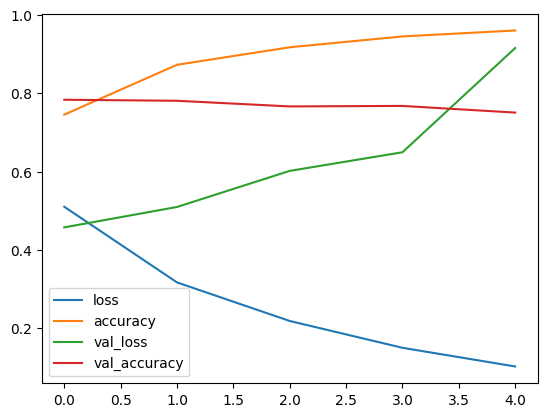

In [57]:
pd.DataFrame(history_model_2.history).plot()

In [58]:
# Lets improvise model_2
# Set random seed and create embedding layer for evary model
tf.random.set_seed(42)
model_3_embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length,
                             name='embedding_layer_3')

# Create LSTM Model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_3_embedding(x)
print(x.shape)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(64)(x)
print(f'lstm shape: {x.shape}')
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3')

(None, 15, 128)
lstm shape: (None, 64)


In [59]:
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [60]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer_3 (Embeddi  (None, 15, 128)           1280000   
 ng)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 15, 64)            49408     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 64)                4160

In [61]:
history_model_3 = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(save_dir, 'model_3_LSTM_updated')])

Saving TensorBoard log files to: model_logs/model_3_LSTM_updated/20230913-235033
Epoch 1/5
215/215 [==============================] - 17s 48ms/step - loss: 0.5114 - accuracy: 0.7479 - val_loss: 0.4608 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 10s 46ms/step - loss: 0.3231 - accuracy: 0.8697 - val_loss: 0.5118 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 11s 53ms/step - loss: 0.2240 - accuracy: 0.9145 - val_loss: 0.5642 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 10s 45ms/step - loss: 0.1586 - accuracy: 0.9419 - val_loss: 0.6324 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 9s 42ms/step - loss: 0.1130 - accuracy: 0.9540 - val_loss: 0.7957 - val_accuracy: 0.7703


In [63]:
# Make predictions on the validation dataset
model_3_pred_probs = model_3.predict(validation_sentences)
model_3_pred_probs.shape, model_3_pred_probs[:10] # view the first 10

24/24 [==============================] - 2s 13ms/step


((762, 1),
 array([[5.9698250e-02],
        [6.8069357e-01],
        [9.9940681e-01],
        [5.1194109e-02],
        [8.1246882e-04],
        [9.9908412e-01],
        [9.2177653e-01],
        [9.9964112e-01],
        [9.9930549e-01],
        [1.6793880e-01]], dtype=float32))

In [64]:
# Round out predictions and reduce to 1-dimensional array
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# Calculate LSTM model results
model_3_results = calculate_results(y_true=validation_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.03412073490814,
 'precision': 0.7735977894089,
 'recall': 0.7703412073490814,
 'f1': 0.767494001182533}

In [71]:
# Create model_4 for GRU
tf.random.set_seed(42)

model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_4'
                                     )

# GRU Model
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_4_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='model_4_GRU')


In [72]:
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [73]:
history_model_4 = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(save_dir, 'model_4_GRU')])

Saving TensorBoard log files to: model_logs/model_4_GRU/20230914-003530
Epoch 1/5
215/215 [==============================] - 11s 35ms/step - loss: 0.5254 - accuracy: 0.7282 - val_loss: 0.4572 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 7s 35ms/step - loss: 0.3171 - accuracy: 0.8702 - val_loss: 0.4925 - val_accuracy: 0.7782
Epoch 3/5
215/215 [==============================] - 7s 31ms/step - loss: 0.2143 - accuracy: 0.9196 - val_loss: 0.5626 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 8s 35ms/step - loss: 0.1498 - accuracy: 0.9494 - val_loss: 0.6291 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 7s 31ms/step - loss: 0.1116 - accuracy: 0.9628 - val_loss: 0.6216 - val_accuracy: 0.7690


In [74]:
# Create model_5 for GRU updated
tf.random.set_seed(42)

model_5_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_5'
                                     )

# GRU Model
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_5_embedding(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(64)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_4_GRU')


In [75]:
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [76]:
history_model_5 = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(save_dir, 'GRU_Updated')])

Saving TensorBoard log files to: model_logs/GRU_Updated/20230914-004414
Epoch 1/5
215/215 [==============================] - 17s 49ms/step - loss: 0.5233 - accuracy: 0.7346 - val_loss: 0.4532 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 10s 45ms/step - loss: 0.3258 - accuracy: 0.8691 - val_loss: 0.5011 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 9s 40ms/step - loss: 0.2263 - accuracy: 0.9145 - val_loss: 0.5580 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 10s 44ms/step - loss: 0.1630 - accuracy: 0.9423 - val_loss: 0.6723 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.1213 - accuracy: 0.9604 - val_loss: 0.6204 - val_accuracy: 0.7572


In [78]:
# Make predictions on the validation dataset
model_5_pred_probs = model_5.predict(validation_sentences)
model_5_pred_probs.shape, model_5_pred_probs[:10] # view the first 10

24/24 [==============================] - 0s 18ms/step


((762, 1),
 array([[0.22156677],
        [0.7533295 ],
        [0.99536675],
        [0.12605025],
        [0.00770757],
        [0.9929638 ],
        [0.78852725],
        [0.99712753],
        [0.99685967],
        [0.32822803]], dtype=float32))

In [79]:
# Bidirectional
tf.random.set_seed
model_6_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='model_6_embedding')

In [80]:
# Bidirectional Model
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer(inputs)
x = model_6_embedding(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_6 = tf.keras.Model(inputs, outputs, name='model_6')


In [81]:
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [82]:
history_model_6 = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels),
                              callbacks=[create_tensorboard_callback(save_dir, 'model_6_bidirectional')])

Saving TensorBoard log files to: model_logs/model_6_bidirectional/20230914-021239
Epoch 1/5
215/215 [==============================] - 17s 50ms/step - loss: 0.5193 - accuracy: 0.7371 - val_loss: 0.4579 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 10s 46ms/step - loss: 0.3120 - accuracy: 0.8697 - val_loss: 0.5054 - val_accuracy: 0.7769
Epoch 3/5
215/215 [==============================] - 9s 42ms/step - loss: 0.2011 - accuracy: 0.9241 - val_loss: 0.5552 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 9s 44ms/step - loss: 0.1324 - accuracy: 0.9565 - val_loss: 0.6382 - val_accuracy: 0.7664
Epoch 5/5
215/215 [==============================] - 10s 46ms/step - loss: 0.0987 - accuracy: 0.9675 - val_loss: 0.6724 - val_accuracy: 0.7690


In [83]:
# Conv1D model
tf.random.set_seed(42)

model_7_embedding = layers.Embedding(input_dim=max_vocab_length,
                                     output_dim=128,
                                     embeddings_initializer='uniform',
                                     input_length=max_length,
                                     name='embedding_7')

In [84]:
# Conv1D model
inputs = layers.Input(shape=(1, ), dtype='string')
x = text_vectorizer(inputs)
x = model_7_embedding(x)
x = layers.Conv1D(filters=32, kernel_size=5, activation='relu')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_7 = tf.keras.Model(inputs, outputs, name='model_7')

In [85]:
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [86]:
history_model_7 = model_7.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(validation_sentences, validation_labels))

Epoch 1/5
215/215 [==============================] - 8s 27ms/step - loss: 0.5689 - accuracy: 0.7197 - val_loss: 0.4734 - val_accuracy: 0.7835
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.3470 - accuracy: 0.8578 - val_loss: 0.4706 - val_accuracy: 0.7953
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.2201 - accuracy: 0.9190 - val_loss: 0.5351 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 5s 21ms/step - loss: 0.1441 - accuracy: 0.9524 - val_loss: 0.6103 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 5s 25ms/step - loss: 0.0994 - accuracy: 0.9663 - val_loss: 0.6562 - val_accuracy: 0.7835


In [88]:
# Universal Sentence Encoder
# We can use this encoding layer in place of our text_vectorizer and embedding layer
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')

In [92]:
# Model_8 using USE
inputs = layers.Input(shape=(1, ), dtype='string')
x = sentence_encoder_layer(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_8 = tf.keras.Model(inputs, outputs, name='model_8')

ValueError: ignored

In [93]:
# Create model using the Sequential API
model_9 = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_9_USE")

# Compile model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9.summary()

Model: "model_9_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_10 (Dense)            (None, 64)                32832     
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [95]:
history_model_9 = model_9.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(validation_sentences, validation_labels))

Epoch 1/10
215/215 [==============================] - 4s 17ms/step - loss: 0.3804 - accuracy: 0.8320 - val_loss: 0.4240 - val_accuracy: 0.8202
Epoch 2/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3748 - accuracy: 0.8336 - val_loss: 0.4232 - val_accuracy: 0.8215
Epoch 3/10
215/215 [==============================] - 3s 15ms/step - loss: 0.3683 - accuracy: 0.8373 - val_loss: 0.4251 - val_accuracy: 0.8241
Epoch 4/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3637 - accuracy: 0.8381 - val_loss: 0.4242 - val_accuracy: 0.8189
Epoch 5/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3583 - accuracy: 0.8416 - val_loss: 0.4294 - val_accuracy: 0.8215
Epoch 6/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3518 - accuracy: 0.8451 - val_loss: 0.4257 - val_accuracy: 0.8202
Epoch 7/10
215/215 [==============================] - 3s 13ms/step - loss: 0.3458 - accuracy: 0.8475 - val_loss: 0.4280 - val_accuracy: 0.8228

<Axes: >

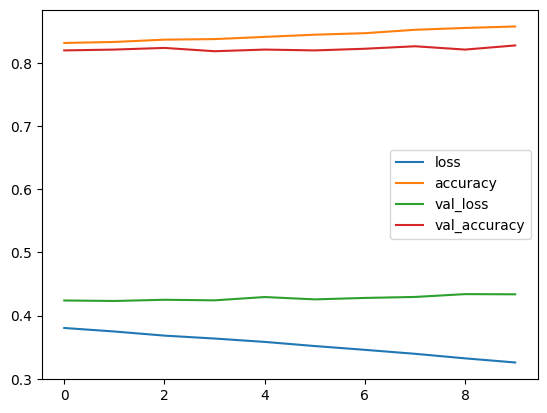

In [96]:
pd.DataFrame(history_model_9.history).plot()